<h2>Linear Algebra (CpE210A)<b>

<h4><b>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib<b>

<h5>Coded and submitted by:<h5>
    <h5><i>De Guzman, Jose Raymundo A.<i>
    <h5><i>58010<i>

<h5><b>Lab Exercises:<b>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

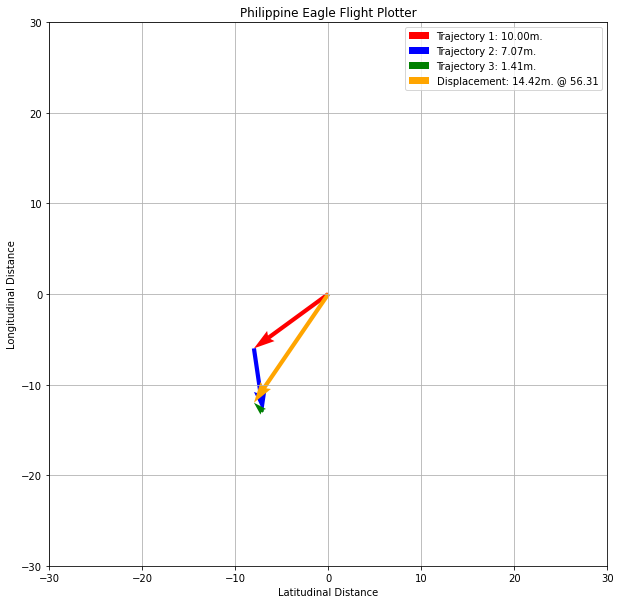

In [91]:
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)
    lat = np.random.randint(-10,10, size=3)
    dist1  = np.array([lat[0], long[0]])                            
    dist2  = np.array([lat[1], long[1]])  
    dist3  = np.array([lat[2], long[2]])
    dist12 = np.add (dist1, dist2)
    dist_total = np.add (dist12, dist3)
    disp = np.sqrt ((dist_total[0]**2) + (dist_total[1]**2))
    alpha = 10**-6
    theta =  np.arctan(dist_total[1]/(dist_total[0] + alpha))
    theta = np.degrees(theta)
    
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    

    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
track_eagle()

<center><h5><i>Flowchart:<i>

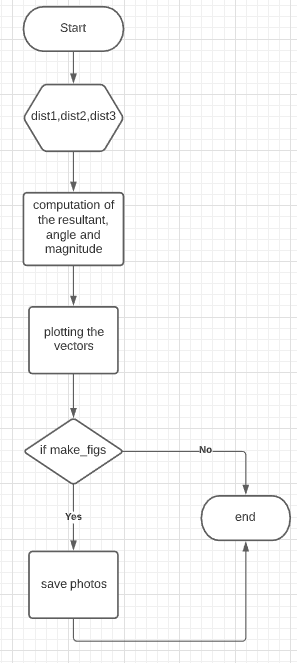

<h5><center><i>The eagle_kinematics function is created to calculate the vector, speed and accelaration. An input from user is needed to produce an output from this program. The input needed are speed and time. The equations that will be use in the graded cell 2 are listed below.<i>

<h5>$$speed_{vector}=(speed_{w} time\_vect_{w}) + (speed_{x} time\_vect_{x}) + (speed_{y} time\_vect_{y}) + (speed_{z} time\_vect_{z})$$<i>
<h5>$$vector_{time}=(vector_{x} time\_vect_{x}) + (vector_{y} time\_vect_{y}) + (vector_{z} time\_vect_{z})$$<i>
<h5>$$acceleration_{time}=(acceleration_{x} time\_vect_{y}) + (acceleration_{y} time\_vect_{z})$$<i>

In [33]:
def eagle_kinematics(speed, time):
    req_shape = 4                                                  #shape of the array 
    vector = np.zeros((req_shape-1,))                              #declaring the vector array to have a default value
    acceleration = np.zeros((req_shape-2,))                        
    time_vect = np.array([time**3, time**2, time, 1])              
    if speed.shape == (req_shape,):
        vector = np.array([3*speed[0],2*speed[1], speed[2]])       #array of the vector, inputted values will be used.
        acceleration = np.array([2*vector[0],vector[1]])            
        speed_time = np.sum(np.multiply(speed, time_vect))         #calculating the speed.
        vector_time = np.sum(np.multiply(vector, time_vect[1:]))    
        acceleration_time = np.sum(np.multiply(acceleration, time_vect[2:])) 
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')  #Output when inputted values are wrong.
    
    return speed_time, vector_time, acceleration_time

In [34]:
x = np.array([2,1,3,2])
t = 2
eagle_kinematics(x, t)

(28, 31, 26)

In [88]:
def month_profit_trace(profit, reach, make_figs=True):
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))                                 #Setting up the array each week
        week2 = np.array((reach[1], profit[1])) 
        week3 = np.array((reach[2], profit[2])) 
        week4 = np.array((reach[3], profit[3])) 
        week1and2 = np.add(week1, week2)
        week3and4 = np.add(week3,week4)
        week_total = np.add(week1and2, week3and4)                              #Computing the total week 
        week_performance = np.sqrt((week_total[0]**2) + (week_total[1]**2))    #Computing the performance the whole month
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(week_total[0] + alpha))      #Computing the reach gradient
        

        plt.figure(figsize=(16,5))                                             
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))                                         #Declaring the minimum and maximum of x-axis
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))               #Declaring the minimum and maximum of y-axis
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1],                                    #Plotting the coordinates for Week1
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.005,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        plt.quiver(week1[0], week1[1], week2[0], week2[1],                     #Plotting the coordinates for Week2 
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Week2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0], week2[0]), np.add(week1[1], week2[1]),     #Setting the coordinates for Week3
                   week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='green', width=0.005,
                  label='Week3: {:.2f}'.format(np.linalg.norm(week3)))
        x_of_week4= np.add (week1[0], np.add(week2[0], week3[0]))              #Setting the x coordinates for Week4
        y_of_week4= np.add (week1[1], np.add(week2[1], week3[1]))              #Setting the y coordinates for Week4
        plt.quiver(x_of_week4, y_of_week4,                                     #Plotting the coordinates for Week4
                   week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='yellow', width=0.005,
                  label='Week4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1],                          #Plotting the efficiency                         
                   angles='xy', scale_units='xy',scale=1, color='black', width=0.0025,
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))
                                                           
        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Inputted shape of profit and reach is not valid')  

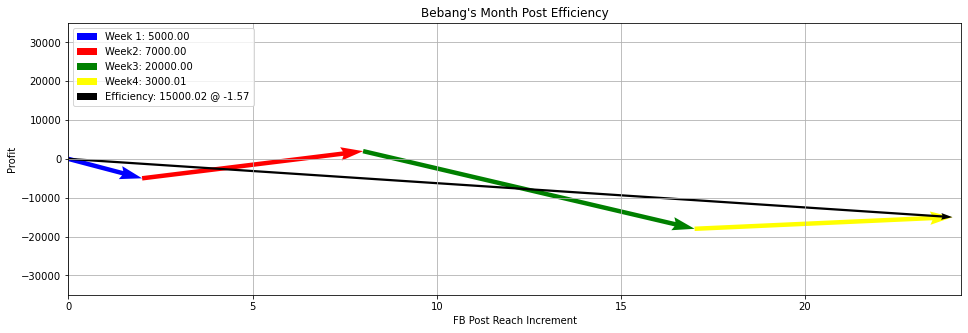

In [89]:
profit= np.array([-5000, 7000, -20000, 3000])    
reach = np.array([2, 6, 9, 7])            

month_profit_trace(profit, reach, make_figs=False) 